In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


Estamos trabalhando com um modo de pesquisa **query()**

In [2]:
import pandas as pd

# Criar um dicionário com dados de exemplo
dados = {
    'produto': ['Ratatouille', 'Lasagna', 'Ratatouille', 'Pizza', 'Ratatouille'],
    'valor': [25.50, 30.00, 20.00, 15.00, 22.00],
    'metodo_pagamento': ['Cartão', 'Dinheiro', 'Cartão', 'Cartão', 'Pix']
}

# Criar o DataFrame a partir do dicionário
vendas = pd.DataFrame(dados)

# Filtrar vendas do produto 'Ratatouille' e calcular o somatório dos valores
somatorio_vendas = vendas.query("produto == 'Ratatouille'")['valor'].sum()

# Contar a frequência de cada método de pagamento para o produto 'Ratatouille'
frequencia_metodo_pagamento = vendas.query("produto == 'Ratatouille'")['metodo_pagamento'].value_counts()

# Exibir os resultados
print(f"As vendas de Ratatouille foram de R${somatorio_vendas:.2f}")
print(f"\nOs métodos de pagamento utilizados foram:\n{frequencia_metodo_pagamento}")


As vendas de Ratatouille foram de R$67.50

Os métodos de pagamento utilizados foram:
metodo_pagamento
Cartão    2
Pix       1
Name: count, dtype: int64


In [3]:
display(vendas)


,produto,valor,metodo_pagamento
0,Ratatouille,25.5,Cartão
1,Lasagna,30.0,Dinheiro
2,Ratatouille,20.0,Cartão
3,Pizza,15.0,Cartão
4,Ratatouille,22.0,Pix


In [4]:
#filtro, NÃO PRECISA DE BIBLIOTECA
vendas = vendas[vendas['produto']=='Ratatouille']
vendas

,produto,valor,metodo_pagamento
0,Ratatouille,25.5,Cartão
2,Ratatouille,20.0,Cartão
4,Ratatouille,22.0,Pix


In [5]:
#Filtro, média
display(vendas.valor.mean())
vendas.valor.describe()

22.5

,valor
count,3.000000
mean,22.500000
std,2.783882
min,20.000000
25%,21.000000
50%,22.000000
75%,23.750000
max,25.500000


In [6]:
#importando
tmdb = pd.read_csv('/content/tmdb_5000_movies.csv')
tmdb.head()
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

Vamos dar uma checada nos dados de receita (revenue) e orçamento (budget). Começando inicialmente com a distribuição das receitas dos filmes:

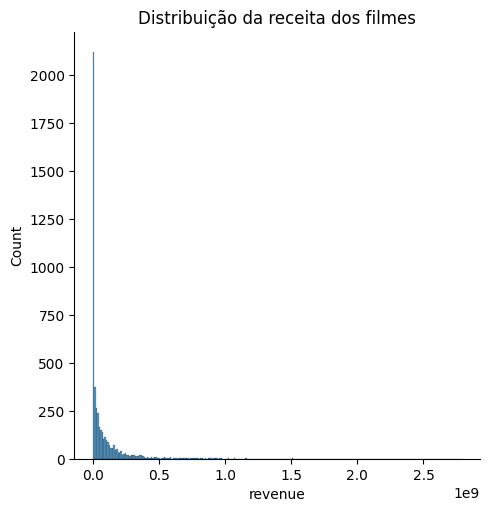

In [7]:
#Gráfico de distribuição do orçamento dos filmes (revenue)
sns.displot(tmdb["revenue"])
plt.title("Distribuição da receita dos filmes")
plt.show()

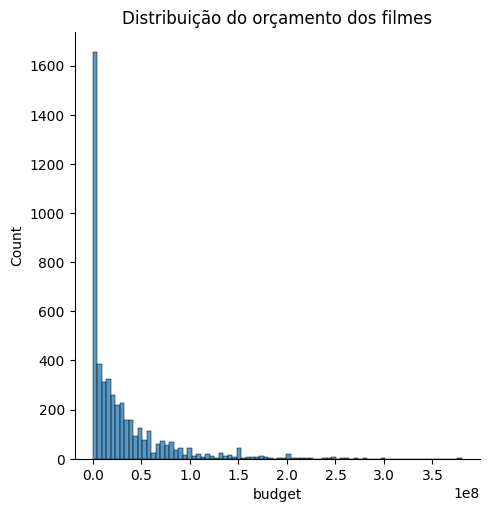

In [8]:
#Gráfico de distribuição do orçamento dos filmes (budget)
sns.displot(tmdb["budget"])
plt.title("Distribuição do orçamento dos filmes")
plt.show()

Uma coisa interessante que podemos fazer para compreender os dados que estamos trabalhando é por meio da utilização do método info(), que traz um resumo de todas as colunas de nosso DataFrame. Com ele podemos saber a quantidade de registros e colunas, quantos dados não-nulos por coluna possuímos e o tipo dos dados:

In [9]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

Podemos observar durante a aula, uma grande quantidade de dados de receita com valor 0. Trataremos isso filtrando os dados só para receitas acima de 0 e recriaremos o histograma com a distribuição dos faturamentos:

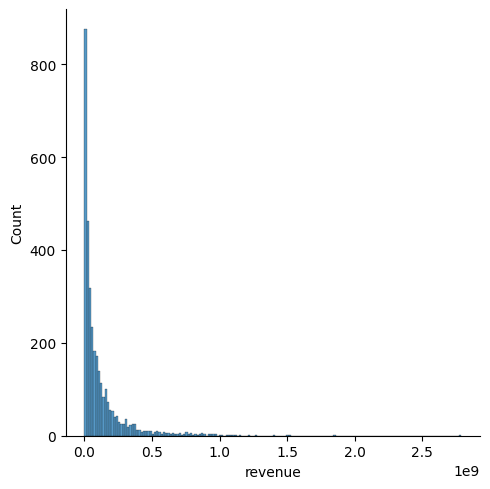

In [10]:
com_faturamento = tmdb.query("revenue > 0")#Dados acima de 0
sns.displot(com_faturamento["revenue"])
plt.show()

Por fim, visualizamos, respectivamente, as diferentes línguas originais dos filmes em um array e contamos quantas vezes cada uma aparece.

In [11]:
tmdb["original_language"].unique()#Verificando valores unicos

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [12]:
tmdb["original_language"].value_counts()#contando quantos veze aparece em cada idioma

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


# Total dos idiomas
Com os dados do TMDB já importados, faremos uma avaliação de quantos idiomas existem em nosso arquivo .csv, primeiro efetuando a contagem dos valores e índices.

In [13]:
tmdb1= tmdb["original_language"].value_counts().index
display(tmdb1)
tmdb2 = tmdb["original_language"].value_counts().values
display(tmdb2)

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

Em seguida, contaremos os valores da coluna original_language, transformando-os em um DataFrame, e reiniciaremos o índice da coluna. Vamos também mudar o nome das colunas para uma de fácil interpretação e exibir os 5 primeiros elementos:

In [14]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()#acrescenta o index(numeração)
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


Com o Seaborn, iremos plotar alguns gráficos para trabalharmos a visualização desses dados. Vamos passar o original_language para o eixo x; total para o eixo y; e contagem_de_lingua como fonte dos dados:

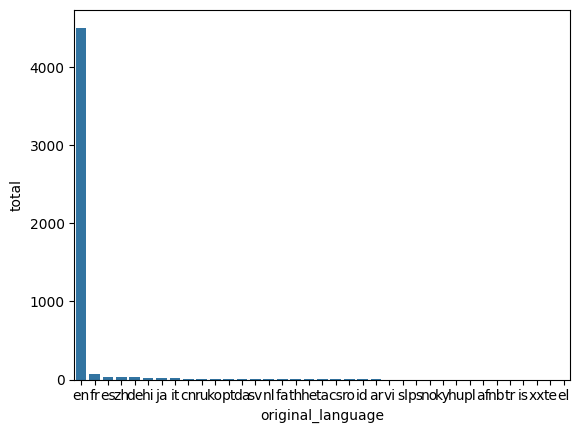

In [15]:
sns.barplot(x="original_language", y = "total", data = contagem_de_lingua)
plt.show()

Também podemos criar um gráfico de barras com dados categóricos (categorias) com o countplot(), passando apenas a coluna com as categorias no eixo x ou y para que ele efetue a contagem dos elementos na coluna:

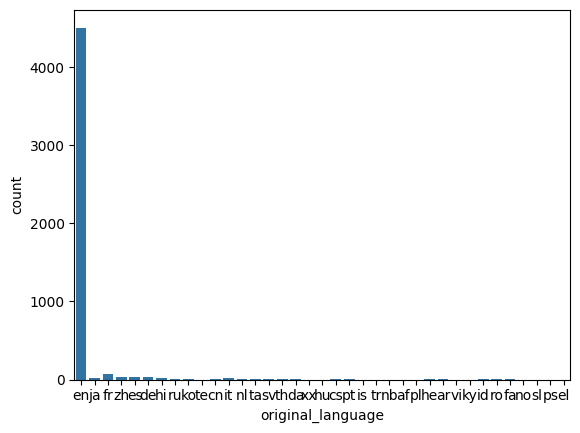

In [16]:
sns.countplot(data=tmdb, x="original_language")
plt.show()


# Total dos idiomas exceto inglês (en)

Seguindo o contexto da aula com o dados do TMDB e a biblioteca do Seaborn importada, vamos agora verificar a quantidade de línguas que existem no nosso dataframe, exceto a língua inglesa.

Para isso, começaremos contando os valores das categorias (línguas) que existem no DataFrame. Em seguida, somamos esses valores, passando para a variável total_geral. Dessa variável, iremos subtrair somente os filmes cuja língua é inglês (en), resultando no nosso total_do_resto:

In [17]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_geral, total_de_ingles, total_do_resto)

4803 4505 298


Prosseguindo, criaremos um dicionário do Pandas contendo duas colunas: "lingua", dividida entre ingles e outros; e "total", com os valores de total_de_ingles e total_do_resto. Com esse dicionário, iremos gerar um DataFrame:

In [18]:
dados = {
  "lingua" : ["ingles", "outros"],
  "total" : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados


,lingua,total
0,ingles,4505
1,outros,298


Por fim, vamos criar, então, um gráfico de barras no qual o eixo x terão as línguas da base, e o y as ocorrências no conjunto:

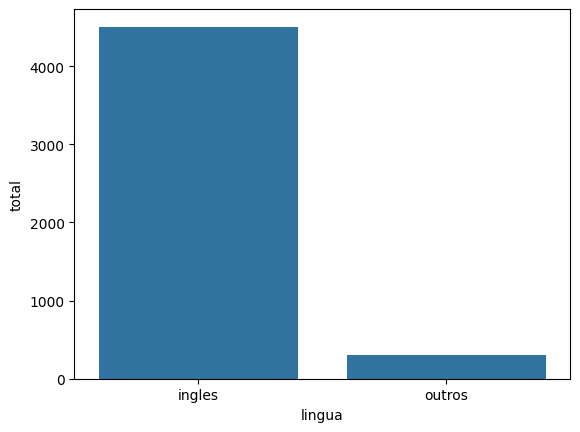

In [19]:
sns.barplot(x="lingua", y="total", data = dados)
plt.show()

Vamos prosseguir para a criação de um novo visual. Para isso, criaremos uma nova variável total_de_outros_filmes_por_lingua, que receberá uma query() retornando todos os valores das categorias diferentes de en:

In [20]:
total_de_outros_filmes_por_lingua = tmdb.query("original_language != 'en'")["original_language"].value_counts()
total_de_outros_filmes_por_lingua.head()

,count
original_language,
fr,70
es,32
zh,27
de,27
hi,19


Observamos os 5 valores mais frequentes logo acima. Agora, vamos construir um countplot() que receba a consulta de todos os filmes excetos em língua inglesa, passando a coluna original_language para a contagem de ocorrências:

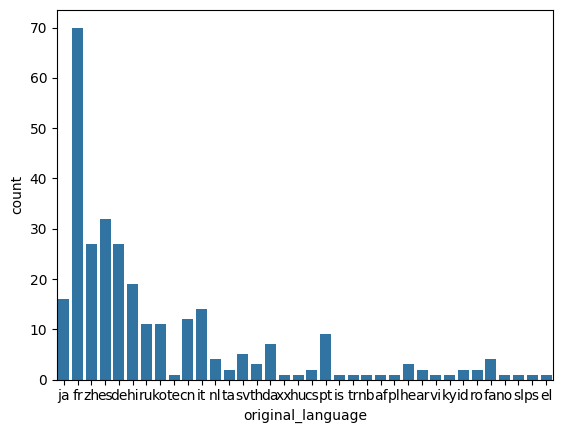

In [21]:
sns.countplot(data=tmdb.query("original_language != 'en'"), x="original_language")
plt.show()

Pronto!

Temos a primeira versão do visual ainda com os dados desordenados, mas conseguimos notar todas as línguas possíveis, exceto inglês, em um gráfico de barras. Vamos ordenar os dados e adicionar cores?

## Para isso, utilizaremos 2 parâmetros no countplot():

* order: como ordenar os dados. Aqui vamos ordenar de acordo com o índice em total_de_outros_filmes_por_lingua;
* hue: determina qual coluna devemos utilizar para colorir o gráfico. Aqui, vamos passar o mesmo valor do eixo x original_language.

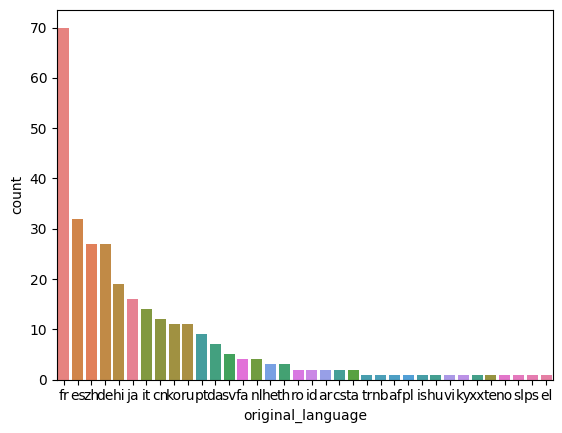

In [22]:
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_de_outros_filmes_por_lingua.index,
              hue="original_language",
              x="original_language")
plt.show()

Aqui utilizamos a “mako” para palette, que sai de um tom de azul mais escuro para um tom verde mais claro. Além disso, passamos para hue_order, responsável por ordenar as cores, a mesma ordenação dos dados (order) e ajustamos o tamanho da figura para (16, 8) pelo figsize do plt.figure().

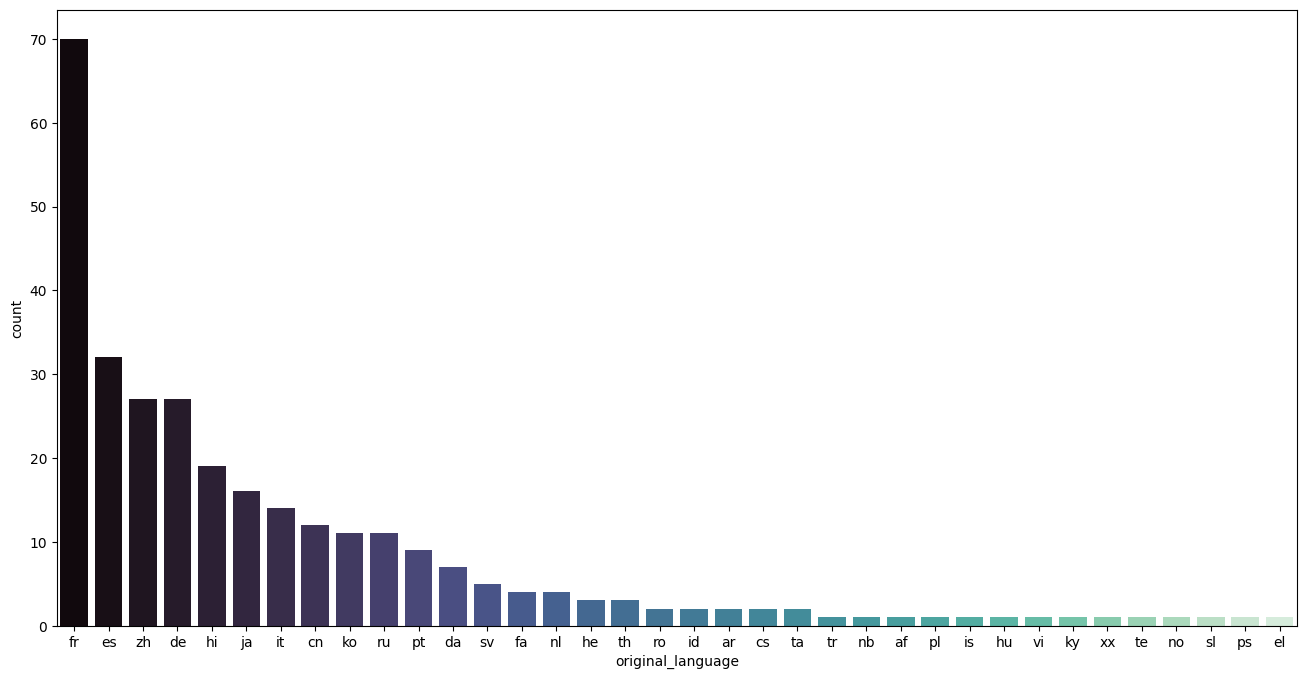

In [23]:
plt.figure(figsize=(16, 8))
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_de_outros_filmes_por_lingua.index,
              palette="mako",
              hue="original_language",
              hue_order=total_de_outros_filmes_por_lingua.index,
              x="original_language")
plt.show()

O desvio padrão é uma medida estatística que indica a dispersão ou variabilidade dos dados em relação à média. Ele representa o quão distantes os valores individuais estão da média do conjunto de dados. Quanto maior o desvio padrão, maior é a dispersão dos dados em torno da média; e quanto menor, menor é a dispersão.

O desvio padrão auxilia na compreensão da variabilidade de um conjunto de dados e avalia o quão representativa é a média. Ele nos fornece uma medida da consistência ou inconsistência dos dados em relação à média e é comumente utilizado para medir a confiança e a margem de erro em cálculos estatísticos, que você aprenderá um pouco mais nos próximos cursos da formação.

Vamos para um exemplo?

Podemos notar o comportamento do desvio padrão observando o código abaixo que cria um DataFrame que contém a quantidade de visitas em um website por dia da semana em duas semanas:

In [24]:
# Criando DataFrame de exemplo

dados = np.array([[100, 120, 90, 110, 130], [80, 150, 70, 140, 60]])

df = pd.DataFrame(dados, index = ["Semana 1", "Semana 2"],
                  columns= ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"])

# Calculando o desvio padrão das visitas por semana
desvio_padrao_semana1 = df.loc["Semana 1"].std()
desvio_padrao_semana2 = df.loc["Semana 2"].std()

print(df)
print(f"\nDesvio Padrão da Semana 1:", {round(desvio_padrao_semana1, 2)})
print(f"Desvio Padrão da Semana 2:", {round(desvio_padrao_semana2, 2)})

          Segunda  Terça  Quarta  Quinta  Sexta
Semana 1      100    120      90     110    130
Semana 2       80    150      70     140     60

Desvio Padrão da Semana 1: {15.81}
Desvio Padrão da Semana 2: {41.83}


Lendo a resposta gerada pelo código, percebemos que o desvio **padrão da Semana 2** foi maior que o da **Semana 1**. Por quê? Sabendo que estamos trabalhando com dados de uma mesma natureza (quantidade de visitas), isso indica que possuímos uma maior dispersão dos dados de visitas na Semana 2 em relação à média semanal (100 visitas), enquanto que na Semana 1 possuímos uma menor dispersão da quantidade de visitas de acordo com a mesma semana (110 visitas).

Trazendo para ciência de dados, podemos interpretar que houve maior instabilidade ou flutuação no número de visitas em diferentes dias da semana na Semana 2, o que pode aumentar o interesse em analisar o que pode ter ocorrido e como planejar um maior engajamento para a semana inteira.

Vamos ler os primeiros 3 valores do DataFrame filmes que criamos na Aula 02 para ver quais médias iremos comparar

# Seaborn

Vamos trazer um exemplo de código explorando algumas de suas possibilidades. Logo abaixo, utilizamos a base do TMDB, que exploramos durante a aula, e filtramos os filmes nas línguas francesa, espanhola e alemã com valores válidos de receita (revenue) e orçamento (budget). Em sequência, criamos 3 gráficos de dispersão com retas de regressão linear (lmplot()) para cada língua:

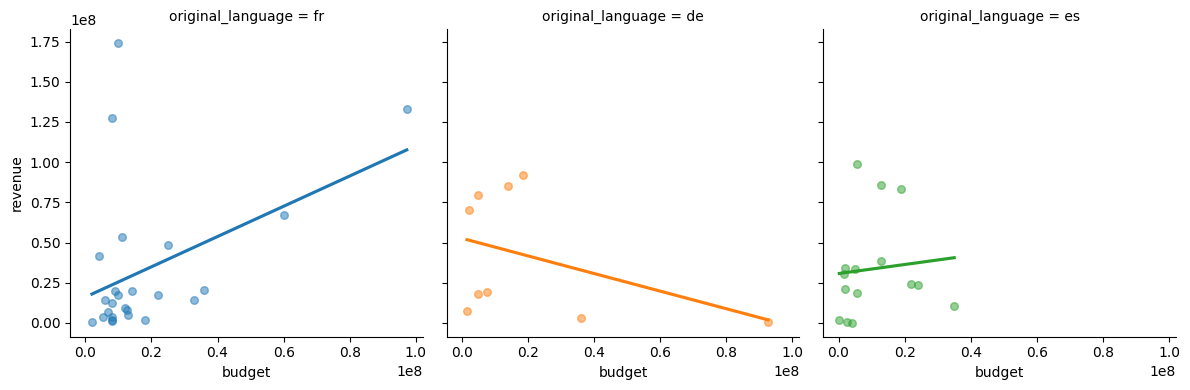

In [25]:
# Filtrando os dados para as colunas desejadas
dados = tmdb[["title", "original_language", "budget", "revenue"]]
linguas = ["fr", "es", "de"]

# Mantendo dados com valores de receita e orçamento válidos e nas línguas desejadas (fr, es, de)
fr_es_de_com_revenue_e_budget = dados.query("revenue > 0 and budget > 0 and original_language == @linguas")

# Construindo o gráfico de dispersão mais a reta de regressão linear para cada caso
sns.lmplot(data=fr_es_de_com_revenue_e_budget, x="budget", y="revenue", col="original_language",
           hue="original_language", ci=None, height=4, scatter_kws={"s": 30, "alpha": 0.5})

Podemos notar diferenças entre as produções em cada uma das línguas, mostrando as tendências da relação entre o orçamento utilizado e a receita gerada pelos filmes. Seria necessário um número maior de filmes para cada uma delas para gerarmos melhores interpretações com os dados.

O order ordena de diversas formas, pode ser do maior para o menor, ordem alfabética, você decide. Já no hue, definimos qual é a coluna da tabela que vai definirá a cor. Além disso, tivemos que definir a ordem de plotagem e a de escolha de cor. Assim, temos o gráfico que queremos.

Além disso, é importante refinar o gráfico. Para isso, no fim do código, podemos passar plt.title("Distribuição da origem da língual original nos filmes exceto em inglês"). Na linha abaixo, passamos plt.show().

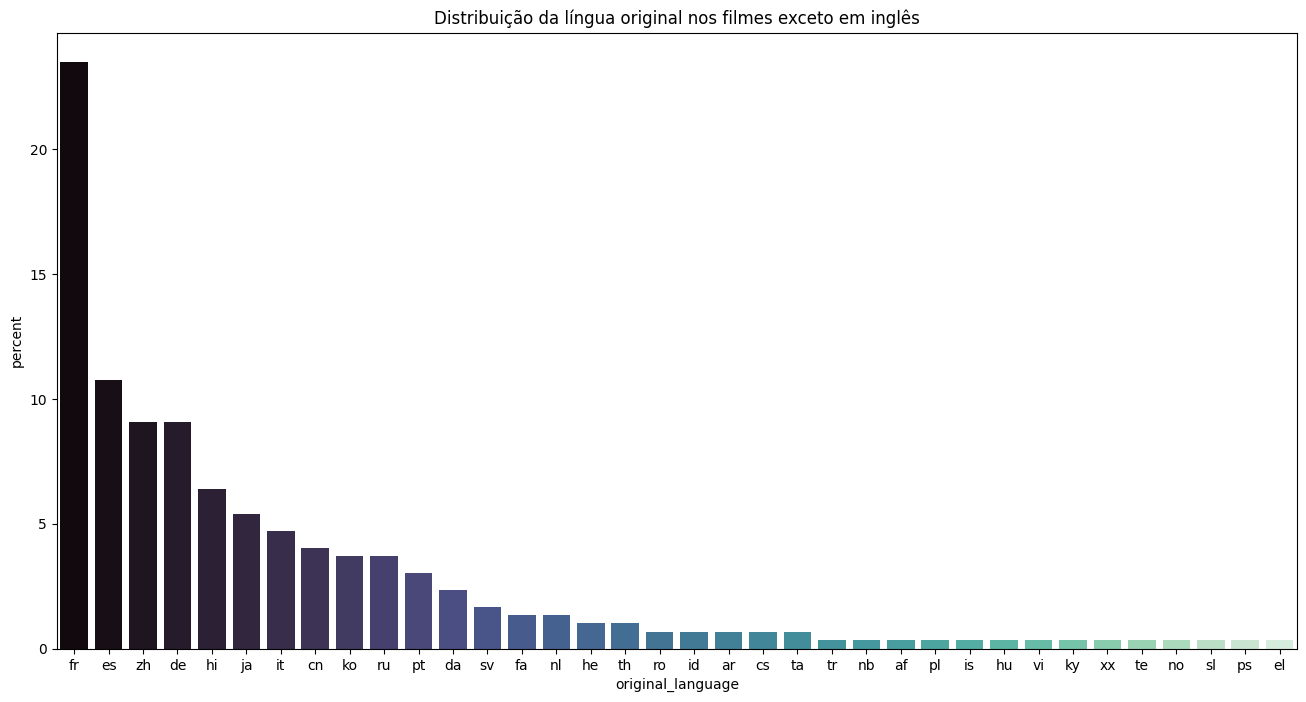

In [26]:
plt.figure(figsize=(16, 8))
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_de_outros_filmes_por_lingua.index,
              palette="mako",
              hue="original_language",
              hue_order=total_de_outros_filmes_por_lingua.index,
              stat="percent",
              x="original_language")
plt.title("Distribuição da língua original nos filmes exceto em inglês")
plt.show()

In [27]:
tmdb.query("original_language != 'en'")["original_language"].value_counts(normalize=True)

,proportion
original_language,
fr,0.234899
es,0.107383
zh,0.090604
de,0.090604
hi,0.063758
ja,0.053691
it,0.046980
cn,0.040268
ko,0.036913


Surgiu uma nova questão.

Lembram do filmes.head, que traz os cinco primeiros filmes? Como parâmetro, podemos passar um número, como 2, e trazer apenas os dois primeiros.

# Inciando um novo DataFrame

In [28]:
notas = pd.read_csv('/content/ratings.csv')
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [29]:
notas.shape

(100836, 4)

In [30]:
#Dando nomes a nova coluna
notas.columns = ['usuarioId', 'filmeId', 'nota','momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [31]:
#Verificando valores unicos
notas.nota.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [32]:
#media das notas
notas.nota.mean()

3.501556983616962

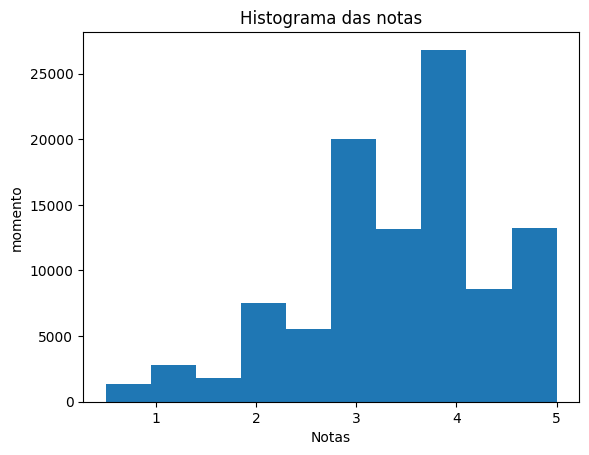

In [33]:
notas.nota.plot.hist()
plt.xlabel('Notas')
plt.ylabel('momento')
plt.title('Histograma das notas')
plt.show()

plt.show()

In [34]:
#Mediana
notas.nota.median()

3.5

In [35]:
mediana = notas.nota.median()
media = notas.nota.mean()
print(f'Mediana é {mediana}')
print(f'Média é {media:.2f}')

Mediana é 3.5
Média é 3.50


In [36]:
notas.nota.describe()

,nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


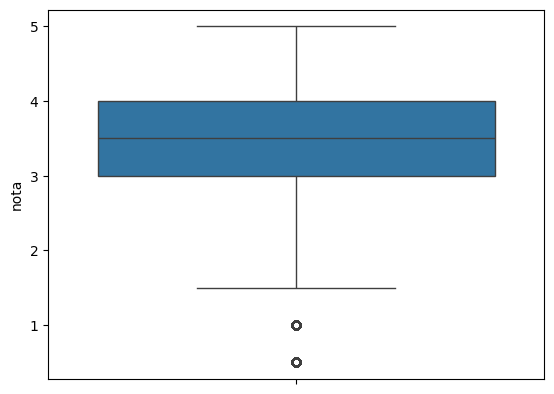

In [37]:
#A média da nota está 3.5
sns.boxplot(notas.nota)
plt.show()

# inciando uma novo DataFrame

In [38]:
#importando um novo DataFrame
filmes = pd.read_csv('/content/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']#modificando os nomes das colunas
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [39]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [40]:
#Filtrando a média da coluna nota
notas[notas['filmeId'] == 1].nota.mean()

3.9209302325581397

In [41]:
notas[notas['filmeId']==2].nota.mean()

3.4318181818181817

In [42]:
#fazendo agrupamento de colunas, pra ver a média por cada avaliação
media_por_filme = notas.groupby('filmeId')['nota'].mean()
media_por_filme.head()

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


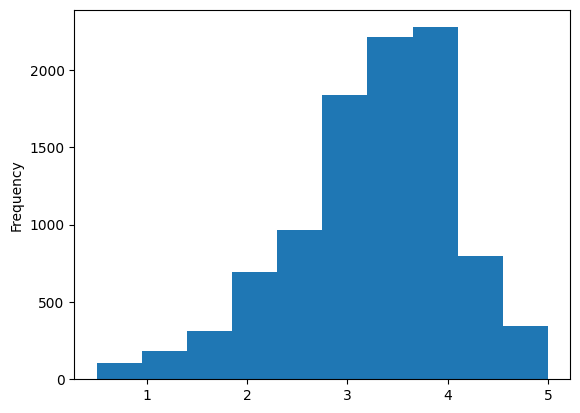

In [43]:
media_por_filme.plot.hist()
plt.show()

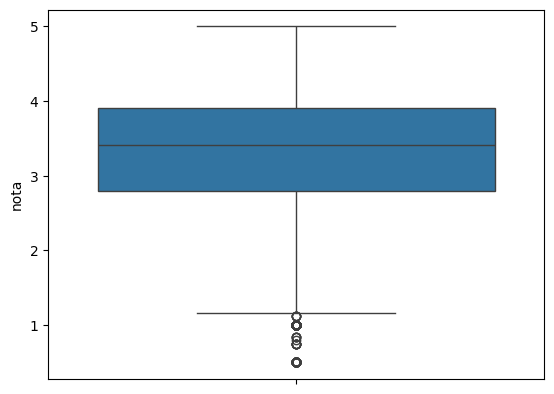

In [44]:
sns.boxplot(media_por_filme)
plt.show()


In [45]:

media_por_filme.describe()

,nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


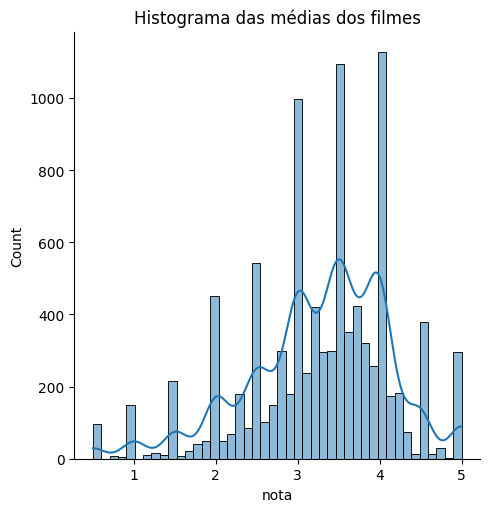

In [46]:
sns.displot(media_por_filme, kde=True)
plt.title("Histograma das médias dos filmes")
plt.show()

Lembram do **filmes.head**, que traz os cinco primeiros filmes? Como parâmetro, podemos passar um número, como 2, e trazer apenas os dois primeiros.

In [47]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


**extraia as notas dos dois filmes em variáveis distintas**

In [48]:
# prompt: extraia as notas dos dois filmes em variáveis distintas

filme1_nota = notas.query("filmeId==1") ["nota"].mean()
filme2_nota = notas.query("filmeId==2")["nota"].mean()


#prompt: extraia as notas dos dois filmes em variáveis distintas

notas_do_toy_story = notas[notas['filmeId'] == 1]['nota']

notas_do_jumanji = notas[notas['filmeId']==2]['nota']

media_do_toy_story = notas_do_toy_story.mean()
media_do_jumanji = notas_do_jumanji.mean()

print(media_do_toy_story, media_do_jumanji)

3.9209302325581397 3.4318181818181817


Conseguimos ver que a média do Toy Story era 3,92 e do Jumanji 3,43. Então nós temos as notas.

Mas parem para pensar.

Pode ser, de repente, que todas as pessoas que votaram no Jumanji, todas elas deram nota 3,5 quase, e uma ou outra deu 3.

Percebem que a distribuição das notas pode ser completamente diferente. Nós não temos como saber olhando só a média. Porque a média é um número.

# **Desvio padrão**

* Vamos acessar a página da Wikipedia em inglês sobre desvio padrão (standart deviation).

* Em português ela vai pras fórmulas direto, mas a versão em inglês tem um exemplo bacana, que ela mostra pra gente como que esse desvio é calculado.

* Então ela dá uma tabelinha pra gente, como por exemplo, os seguintes números, 2, 4, 4, 4, 5, 5, 7, 9. E ela calcula a média, a média deu 5.

* Depois, ele fala que pra gente calcular o quanto desviou do número 5, vamos verificar as notas.

* Quanto que desviou a primeira nota? o 2 de 5? 2 e 5 desviou 3. a distância de 2 e 5 é 3. E o mesmo com as outras notas:

  * 2 e 5, desvio é de 3
  * 4 e 5, desvio é de 1
  * 4 e 5, desvio é de 1
  * 4 e 5, desvio é de 1
  * 5 e 5, desvio é de 0
  * 5 e 5, desvio é de 0
  * 7 e 5, desvio é de 2
  * 9 e 5, desvio é de 4


* Então você faz o que? Você vai para cada uma das notas, cada um dos números e calcula a diferença com a média. Isso é o quanto desviou, o quanto você fugiu da média em cada uma dessas notas.

* Mas tem que tomar um cuidado. Porque o desvio para menos, se eu desviei para menos, isso fica -3 e eu desviei para mais, +3, eles não podem se anular, porque senão eles iam fingir que o desvio era 0 e não é, o desvio de -3 com o desvio de +3 piora a minha situação de desvio, ele não se anula.

* Então existe uma sacada matemática aqui que eles fazem assim: para a gente tirar o menos de tudo, para não ter o menos, eleva ao quadrado:

  * (2-5)² = (-3)² = 9
  * (4-5)²(-1)² = 1
  * (4-5)²(-1)²= 1
  * (4-5)²(-1)²= 1
  * (4-5)²(-1)² = 1
  * (5-5)² = 0² = 0
  * (5-5)² = 0² = 0
  * (7-5)² = 2² = 4
  * (9-5)² = 4² = 16

* Dessa forma, todas as diferenças são positivas.

* Então quanto mais você está longe da média, maior esse número, não só isso. Se você está longe, é longe ao quadrado, que é um número muito maior.

* Então quanto mais você foge da média, maior será esse desvio de forma quadrática.

* E no final você tira uma raiz quadrada disso, no final você tira a raiz quadrada para tirar esse impacto do quadrado.

* Essa fórmula de desvio padrão é usada direto em diversas situações.

